# Conjunto de dados para classificação de faixa salarial

## Definição do Problema

O dataset involve a predição se a pessoa ganha anualmente um valor maior que 50 mil. O data set pode ser encontrado em: <https://archive.ics.uci.edu/ml/datasets/Adult>

É um problema de classificação binário (2-classes). O número de observações para cada classe não é balanceado. Existem 48842 observações com 15 variáveis. Lista de atributos: 

0. class: >50K, <=50K. 

1. age: continuous. 
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
3. fnlwgt: continuous. 
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
5. education-num: continuous. 
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
10. sex: Female, Male. 
11. capital-gain: continuous. 
12. capital-loss: continuous. 
13. hours-per-week: continuous. 
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.:

### Importação das bibliotecas

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Carregando e definindo as colunas do dataset

In [6]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
           'class']
data = pd.read_csv('adult_data_set.csv',names=columns)

### Visualização e descrição dos dados

In [7]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
print(data.shape)

(48842, 15)


In [34]:
print(data.groupby('class').size())

class
 <=50K    37155
 >50K     11687
dtype: int64


In [13]:
data['class'] = data['class'].str.replace('.', '')
print(data.groupby('class').size())

class
 <=50K    37155
 >50K     11687
dtype: int64


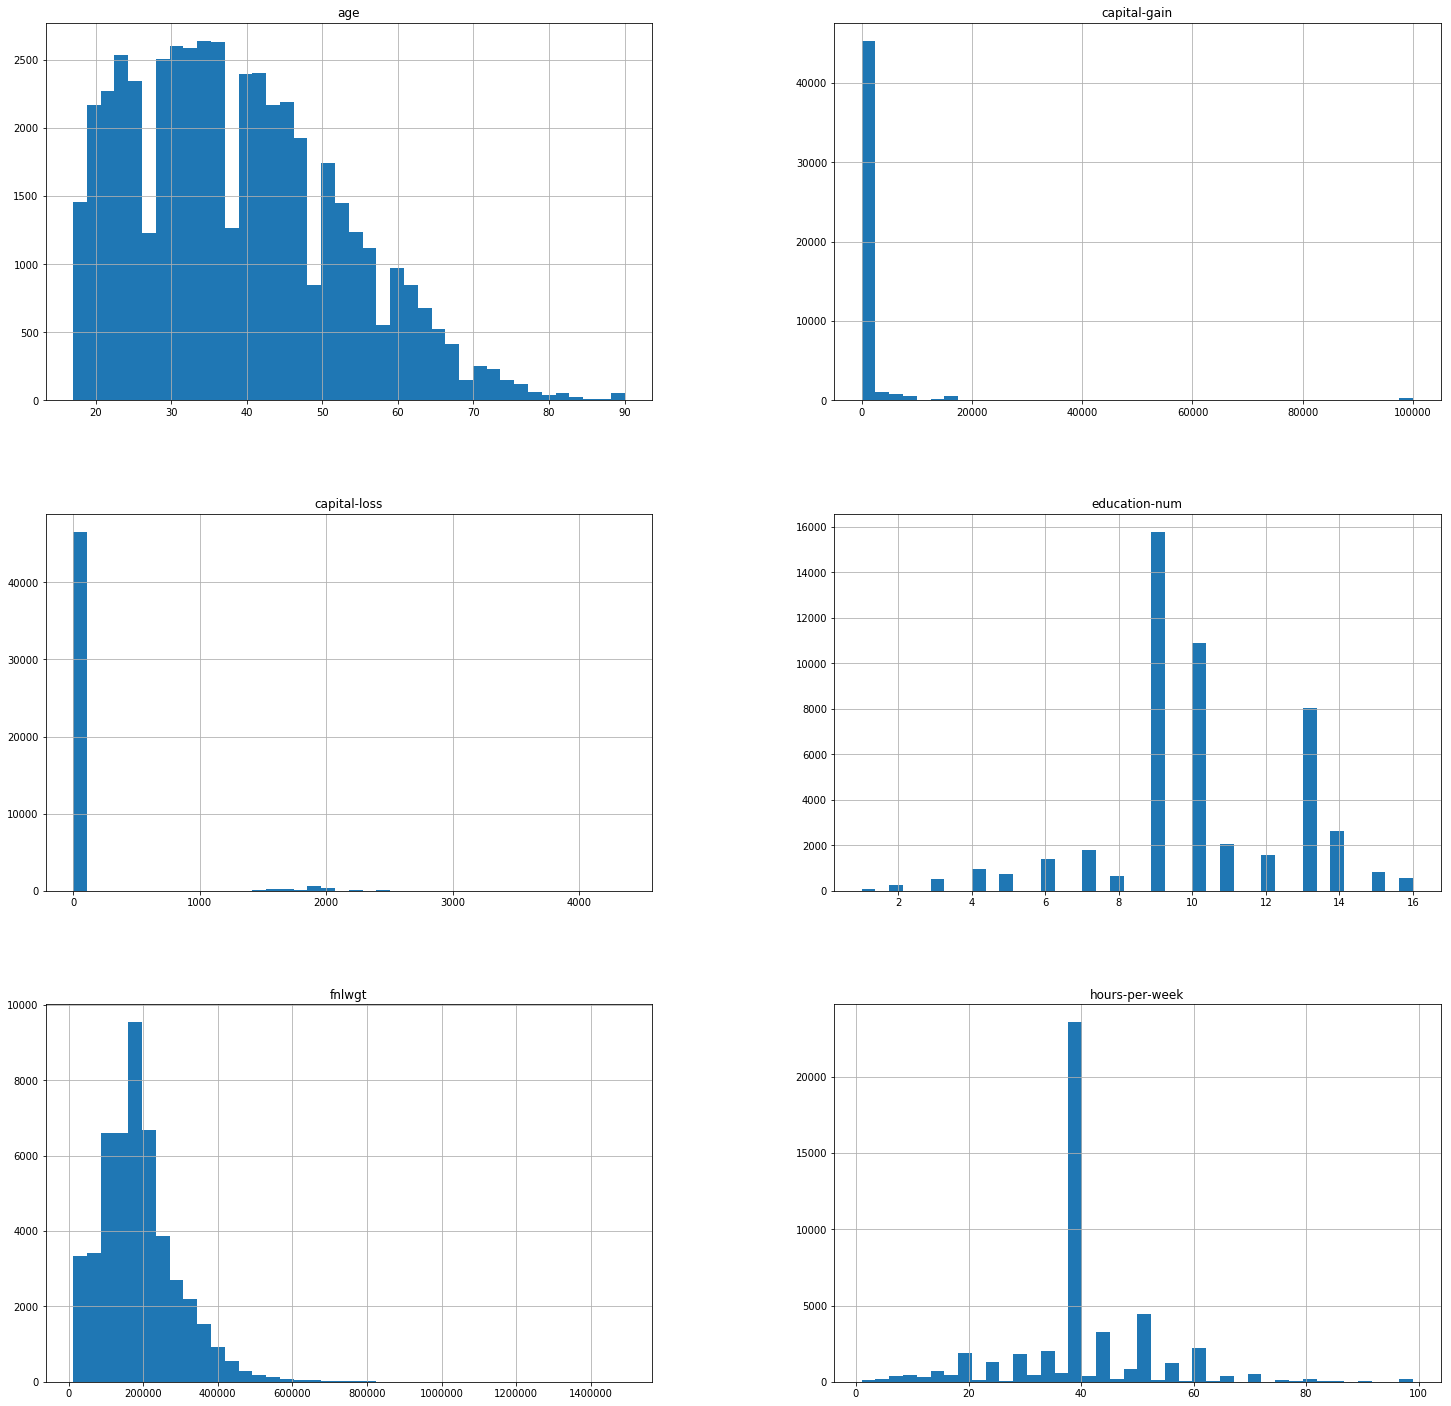

In [14]:
data.hist(figsize=(25,25), bins=40);

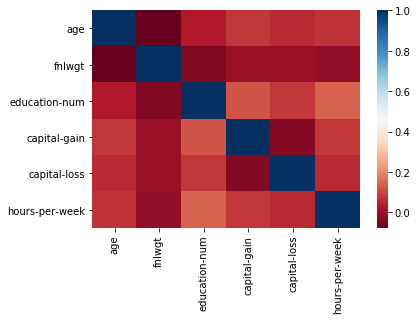

In [30]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu')

### Criação do dataset de validação 

In [15]:
dataset = data.values
print(dataset)

[[39 ' State-gov' 77516 ... 40 ' United-States' ' <=50K']
 [50 ' Self-emp-not-inc' 83311 ... 13 ' United-States' ' <=50K']
 [38 ' Private' 215646 ... 40 ' United-States' ' <=50K']
 ...
 [38 ' Private' 374983 ... 50 ' United-States' ' <=50K']
 [44 ' Private' 83891 ... 40 ' United-States' ' <=50K']
 [35 ' Self-emp-inc' 182148 ... 60 ' United-States' ' >50K']]


In [35]:
X = dataset[:,:-1]
y = dataset[:,-1]
print (y)
country_le = LabelEncoder()
country_le.fit(X[:,-1])
labelEnconder = LabelEncoder()
y = labelEnconder.fit_transform(y)
print (y)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
[0 0 0 ... 0 0 1]


### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [28]:
resultados = {}
resultados['DTC'] = { 'model': DecisionTreeClassifier() }
resultados['SVC'] = { 'model': SVC() }
resultados['KNN'] = { 'model': KNeighborsClassifier() }
resultados['LOR'] = { 'model': LogisticRegression() }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': SGDClassifier(max_iter=1000) }
resultados['RF'] = { 'model': RandomForestClassifier() }
resultados['GB'] = { 'model': GradientBoostingClassifier() }

In [37]:
'1,3,5,6,7,8,9,13'
for key in resultados:
    print('processando {}...'.format(key))
    kfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
    resultados[key]['accuracys'] = []
    for idx_train, idx_test in kfold.split(X,y):
        X_train, X_test, y_train, y_test = X[idx_train], X[idx_test],y[idx_train], y[idx_test]
        X_train[:,1] = labelEnconder.fit_transform(X_train[:,1])
        X_test[:,1] = labelEnconder.transform(X_test[:,1])
        X_train[:,3] = labelEnconder.fit_transform(X_train[:,3])
        X_test[:,3] = labelEnconder.transform(X_test[:,3])
        X_train[:,5] = labelEnconder.fit_transform(X_train[:,5])
        X_test[:,5] = labelEnconder.transform(X_test[:,5])
        X_train[:,6] = labelEnconder.fit_transform(X_train[:,6])
        X_test[:,6] = labelEnconder.transform(X_test[:,6])
        X_train[:,7] = labelEnconder.fit_transform(X_train[:,7])
        X_test[:,7] = labelEnconder.transform(X_test[:,7])
        X_train[:,8] = labelEnconder.fit_transform(X_train[:,8])
        X_test[:,8] = labelEnconder.transform(X_test[:,8])
        X_train[:,9] = labelEnconder.fit_transform(X_train[:,9])
        X_test[:,9] = labelEnconder.transform(X_test[:,9])
        X_train[:,13] = country_le.transform(X_train[:,13])
        X_test[:,13] = country_le.transform(X_test[:,13])
        resultados[key]['model'].fit(X_train, y_train)
        resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
        resultados[key]['accuracys'].append(accuracy_score(y_test, resultados[key]['y_pred']))
    resultados[key]['accuracy'] = np.mean(resultados[key]['accuracys'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [40]:
df_T = pd.DataFrame(resultados).T
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.81174
GB,0.86614
KNN,0.777466
LOR,0.7945
NB,0.794931
RF,0.850948
SGD,0.730771
SVC,0.760882


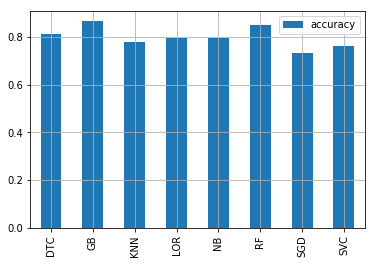

In [41]:
df_T.plot(kind='bar', grid=True);